### Table Content
---------------------

- [Summary](#summary)
- [Import libraries and packages](#libs)
- [Import Reliance dataset](#dataset)
    - [Rename columns name](#cname)
- [Preprocessing data](#predata)
    - [Checking Null/NA value and remove it](#nullna)
    - [Checking columns datatype](#coldt)
    - [Converting Date column from string to datetime format](#dateformat)
    - [Sorting dataset by Date](#sortdate)
- [Exploratory Data Analysis - EDA](#eda)
    - [Get total duration](#duration)
    - [Monthwise comparision between Stock actual, open and close price with chart](#month_op_close)
    - [Monthwise High and Low stock price with chart](#month_high_low)
    - [Trend comparision between stock price, open price, close price, high price, low price with chart](#trend) 
- [Close price prediction preparation and preprocessing](#closepred)
    - [Make separate dataframe with close price](#sepclose)
    - [Plotting stock close price chart](#plotclose)
    - [Normalizing/scaling close values between 0 to 1](#norm)
    - [Split data for training and testing](#splitdata)
- [Prepared data for according to time-series-prediction](#tsp)
- [Algorithms](#algo)
    - [Linear Regression](#lstm)
        - [RMSE, MSE and MAE](#lstmevalmat)
        - [Explained variance regression score](#lstmevariance)
        - [R<sup>2</sup> score for regression](#lstmrsquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#lstmrloss)
        - [Comparision between original stock close price vs predicted close price with chart](#lstmcomparechart)
        - [Predicting next 10 days](#lstmpred10)
        - [Plotting last 15 days and next predicted 10 days](#lstmlast25)
        - [Plotting whole closing stock price with next 10 days prediction](#lstmwholepred)
    - [LSTM](#lstm)
        - [RMSE, MSE and MAE](#lstmevalmat)
        - [Explained variance regression score](#lstmevariance)
        - [R<sup>2</sup> score for regression](#lstmrsquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#lstmrloss)
        - [Comparision between original stock close price vs predicted close price with chart](#lstmcomparechart)
        - [Predicting next 10 days](#lstmpred10)
        - [Plotting last 15 days and next predicted 10 days](#lstmlast25)
        - [Plotting whole closing stock price with next 10 days prediction](#lstmwholepred)
    - [GRU](#gru)
        - [RMSE, MSE and MAE](#gruevalmat)
        - [Explained variance regression score](#gruevariance)
        - [R<sup>2</sup> score for regression](#grursquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#grurloss)
        - [Comparision between original stock close price vs predicted close price with chart](#grucomparechart)
        - [Predicting next 10 days](#grupred10)
        - [Plotting last 15 days and next predicted 10 days](#grulast25)
        - [Plotting whole closing stock price with next 10 days prediction](#gruwholepred)
    - [LSTM + GRU](#lstm_gru)
        - [RMSE, MSE and MAE](#lstm_gruevalmat)
        - [Explained variance regression score](#lstm_gruevariance)
        - [R<sup>2</sup> score for regression](#lstm_grursquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#lstm_grurloss)
        - [Comparision between original stock close price vs predicted close price with chart](#lstm_grucomparechart)
        - [Predicting next 10 days](#lstm_grupred10)
        - [Plotting last 15 days and next predicted 10 days](#lstm_grulast25)
        - [Plotting whole closing stock price with next 10 days prediction](#lstm_gruwholepred)
- [Conclusion](#conclusion)
    - [Plotting final chart with all algorithms and compare prediction to each others](#finalchart)

<a name="summary"></a>
### Summary

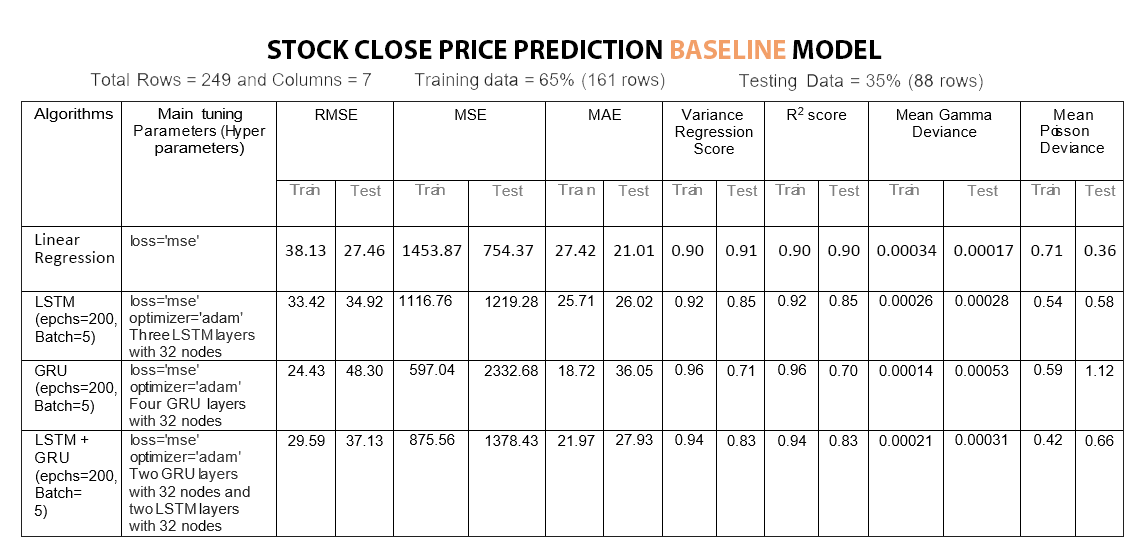

## Stock Prediction Baseline Models

<a name="libs"></a>
### Import libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


<a name="dataset"></a>
### Import dataset 

In [ ]:
# Import dataset
url = 'https://raw.githubusercontent.com/wzziyao/CIS519_Group_Project/main/RELIANCE.csv'
bist100 = pd.read_csv(url)
bist100.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


<a name="cname"></a>
### Rename columns

In [ ]:
# Rename columns
bist100.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"}, inplace= True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


<a name="predata"></a>

### Preprocessing Data

<a name="nullna"></a>
### Checking null and na value

In [ ]:
# Checking null value
bist100.isnull().sum()

date         0
open         1
high         1
low          1
close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
# Checking na value
bist100.isna().any()

date         False
open          True
high          True
low           True
close         True
Adj Close     True
Volume        True
dtype: bool

In [ ]:
bist100.dropna(inplace=True)
bist100.isna().any()

date         False
open         False
high         False
low          False
close        False
Adj Close    False
Volume       False
dtype: bool

<a name="coldt"></a>

### Checking datatype of each column

In [ ]:
# Checking Data type of each column
print("Date column data type: ", type(bist100['date'][0]))
print("Open column data type: ", type(bist100['open'][0]))
print("Close column data type: ", type(bist100['close'][0]))
print("High column data type: ", type(bist100['high'][0]))
print("Low column data type: ", type(bist100['low'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>


<a name="dateformat"></a>

### Convert date from string to date format

In [ ]:
# convert date field from string to Date format and make it index
bist100['date'] = pd.to_datetime(bist100.date)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


<a name="sortdate"></a>

### Sorting dataset by date format

In [ ]:
bist100.sort_values(by='date', inplace=True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


In [ ]:
bist100.shape

(249, 7)

<a name="eda"></a>

### EDA - Exploratory Data Analysis

<a name="duration"></a>

### Get the duration of dataset

In [ ]:
print("Starting date: ",bist100.iloc[0][0])
print("Ending date: ", bist100.iloc[-1][0])
print("Duration: ", bist100.iloc[-1][0]-bist100.iloc[0][0])

Starting date:  2020-08-19 00:00:00
Ending date:  2021-08-18 00:00:00
Duration:  364 days 00:00:00


<a name="month_op_close"></a>

### Monthwise comparision between Stock actual, open and close price

In [ ]:
monthvise= bist100.groupby(bist100['date'].dt.strftime('%B'))[['open','close']].mean().sort_values(by='close')
monthvise.head()

,open,close
date,,
January,1968.000006,1957.662494
April,1963.384207,1961.278956
November,1985.213160,1964.847367
May,1967.050006,1972.582513
December,1980.765897,1978.338645


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock actual, open and close price')
fig.show()

<a name="month_high_low"></a>

### Monthwise High and Low stock price 

In [ ]:
bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

date
April        1876.699951
August       2041.150024
December     1855.250000
February     1848.000000
January      1830.000000
July         2016.250000
June         2081.000000
March        1973.699951
May          1906.000000
November     1835.099976
October      1991.000000
September    2044.250000
Name: low, dtype: float64

In [ ]:
monthvise_high= bist100.groupby(bist100['date'].dt.strftime('%B'))['high'].max()
monthvise_low= bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

<a name="trend"></a>

### Trend comparision between stock price, open price, close price, high price, low price

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(bist100, x=bist100.date, y=[bist100['open'], bist100['close'], 
                                          bist100['high'], bist100['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

<a name="closepred"></a>

### Close price prediction preparation and preprocessing

<a name="sepclose"></a>

### Make separate dataframe with close price

In [ ]:
closedf = bist100[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (249, 2)


<a name="plotclose"></a>

### Plotting stock close price chart

In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="norm"></a>

### Normalizing / scaling close value between 0 to 1

In [ ]:
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(249, 1)


<a name="splitdata"></a>

### Split data for training and testing
Ratio for training and testing data is 65:35

In [ ]:
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (161, 1)
test_data:  (88, 1)


In [ ]:
import matplotlib.pyplot as plt

# Generate some random data
train_ind = np.where()
data = train_data[1]

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Chart')
plt.show()


TypeError: ignored

<a name="tsp"></a>

### Create new dataset according to requirement of time-series prediction 

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
y_train

X_train:  (145, 15)
y_train:  (145,)
X_test:  (72, 15)
y_test (72,)


array([0.66183191, 0.97813915, 0.99005378, 0.9544136 , 0.98818908,
       1.        , 0.94653949, 0.96094054, 0.85764621, 0.76502254,
       0.80573978, 0.70296297, 0.74544121, 0.7755905 , 0.83526734,
       0.81309587, 0.79423948, 0.76719835, 0.76336526, 0.86106499,
       0.823249  , 0.81123067, 0.81869046, 0.90913782, 0.92322826,
       0.75538743, 0.69177379, 0.69260243, 0.65053851, 0.58568191,
       0.54910888, 0.56174895, 0.38779525, 0.39898469, 0.35122247,
       0.38323671, 0.44042687, 0.07355987, 0.01750947, 0.14763777,
       0.23425202, 0.38789895, 0.43255275, 0.50269384, 0.32169492,
       0.28605475, 0.32003738, 0.31351019, 0.30097383, 0.27186085,
       0.11924997, 0.22534185, 0.25300471, 0.21933294, 0.22927891,
       0.18203498, 0.23404486, 0.24077922, 0.25300471, 0.21715712,
       0.24088267, 0.31454625, 0.38334016, 0.34200169, 0.33951526,
       0.30946968, 0.27434728, 0.27890607, 0.29765851, 0.30998771,
       0.20254865, 0.19633233, 0.21114796, 0.31537514, 0.33433

<a name="algo"></a>

### Algorithms

<a name="svr"></a>

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Lets Do the prediction 

train_predict=lm.predict(X_train)
test_predict=lm.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (145, 1)
Test data prediction: (72, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  38.129641288243924
Train data MSE:  1453.869544770156
Test data MAE:  27.42192807550075
-------------------------------------------------------------------------------------
Test data RMSE:  27.46578398999777
Test data MSE:  754.3692901852179
Test data MAE:  21.00627997530567


In [ ]:
# Explained variance regression score
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8953363987763453
Test data explained variance regression score: 0.9100055894991483


In [ ]:
# R2 score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8953363987763453
Test data R2 score: 0.9042618443873572


In [ ]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0003432277915006267
Test data MGD:  0.0001725179519577242
----------------------------------------------------------------------
Train data MPD:  0.7055000485327269
Test data MPD:  0.3605105708933125


<a name="lstm"></a>

### LSTM

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (145, 15, 1)
X_test:  (72, 15, 1)


<a name="lstmevalmat"></a>

#### LSTM model structure

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
29/29 [==============================] - 9s 84ms/step - loss: 0.0623 - val_loss: 0.0244
Epoch 2/200
29/29 [==============================] - 1s 20ms/step - loss: 0.0329 - val_loss: 0.0327
Epoch 3/200
29/29 [==============================] - 1s 21ms/step - loss: 0.0338 - val_loss: 0.0478
Epoch 4/200
29/29 [==============================] - 1s 21ms/step - loss: 0.0371 - val_loss: 0.0330
Epoch 5/200
29/29 [==============================] - 1s 21ms/step - loss: 0.0298 - val_loss: 0.0214
Epoch 6/200
29/29 [==============================] - 1s 23ms/step - loss: 0.0310 - val_loss: 0.0367
Epoch 7/200
29/29 [==============================] - 1s 21ms/step - loss: 0.0293 - val_loss: 0.0192
Epoch 8/200
29/29 [==============================] - 1s 20ms/step - loss: 0.0274 - val_loss: 0.0184
Epoch 9/200
29/29 [==============================] - 1s 23ms/step - loss: 0.0268 - val_loss: 0.0205
Epoch 10/200
29/29 [==============================] - 2s 67ms/step - loss: 0.0255 - val_loss: 0.0158

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 13ms/step


((145, 1), (72, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="lstmevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  31.664757646193365
Train data MSE:  1002.6568767921611
Test data MAE:  23.412281930765094
-------------------------------------------------------------------------------------
Test data RMSE:  35.09926347978949
Test data MSE:  1231.9582968236843
Test data MAE:  27.29649010557727


<a name="lstmevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9289413195993959
Test data explained variance regression score: 0.8463439071075831


<a name="lstmrsquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.927819053714809
Test data R2 score: 0.8436502961293222


<a name="lstmrloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.00023477005773301707
Test data MGD:  0.00028212602035478557
----------------------------------------------------------------------
Train data MPD:  0.48447822508635063
Test data MPD:  0.5890913525207806


<a name="lstmcomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="lstmpred10"></a>

#### Predicting next 10 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="lstmlast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstmwholepred"></a>

#### Plotting whole closing stock price with prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="gru"></a>

### GRU

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (145, 15, 1)
X_test:  (72, 15, 1)



#### GRU model structure

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
29/29 [==============================] - 9s 102ms/step - loss: 0.0474 - val_loss: 0.0228
Epoch 2/200
29/29 [==============================] - 1s 39ms/step - loss: 0.0277 - val_loss: 0.0158
Epoch 3/200
29/29 [==============================] - 1s 31ms/step - loss: 0.0264 - val_loss: 0.0141
Epoch 4/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0211 - val_loss: 0.0119
Epoch 5/200
29/29 [==============================] - 1s 24ms/step - loss: 0.0178 - val_loss: 0.0107
Epoch 6/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0156 - val_loss: 0.0097
Epoch 7/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0140 - val_loss: 0.0075
Epoch 8/200
29/29 [==============================] - 1s 24ms/step - loss: 0.0150 - val_loss: 0.0115
Epoch 9/200
29/29 [==============================] - 1s 26ms/step - loss: 0.0115 - val_loss: 0.0066
Epoch 10/200
29/29 [==============================] - 1s 24ms/step - loss: 0.0118 - val_loss: 0.004

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 10ms/step


((145, 1), (72, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="gruevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  29.212882365967467
Train data MSE:  853.3924961278531
Test data MAE:  20.290575332596976
-------------------------------------------------------------------------------------
Test data RMSE:  34.21925737258351
Test data MSE:  1170.9575751311113
Test data MAE:  25.676701865125867


<a name="gruevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.939562472118884
Test data explained variance regression score: 0.8663165575815468


<a name="grursquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.938564548502111
Test data R2 score: 0.8513919906307688


<a name="grurloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.00019926949912504283
Test data MGD:  0.0002682965437000183
----------------------------------------------------------------------
Train data MPD:  0.4117601770347235
Test data MPD:  0.560153492837666


<a name="grucomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="grupred10"></a>

#### Predicting next 10 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="grulast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="gruwholepred"></a>

#### Plotting whole closing stock price with prediction

In [ ]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstm_gru"></a>

### LSTM + GRU

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (145, 15, 1)
X_test:  (72, 15, 1)


#### Model structure

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
29/29 [==============================] - 11s 85ms/step - loss: 0.0739 - val_loss: 0.0455
Epoch 2/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0349 - val_loss: 0.0235
Epoch 3/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0314 - val_loss: 0.0219
Epoch 4/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0318 - val_loss: 0.0209
Epoch 5/200
29/29 [==============================] - 1s 26ms/step - loss: 0.0353 - val_loss: 0.0272
Epoch 6/200
29/29 [==============================] - 1s 27ms/step - loss: 0.0281 - val_loss: 0.0318
Epoch 7/200
29/29 [==============================] - 1s 37ms/step - loss: 0.0289 - val_loss: 0.0163
Epoch 8/200
29/29 [==============================] - 1s 37ms/step - loss: 0.0252 - val_loss: 0.0236
Epoch 9/200
29/29 [==============================] - 1s 37ms/step - loss: 0.0260 - val_loss: 0.0132
Epoch 10/200
29/29 [==============================] - 1s 26ms/step - loss: 0.0245 - val_loss: 0.019

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 11ms/step


((145, 1), (72, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="lstm_gruevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  31.42886456172889
Train data MSE:  987.7735276394982
Test data MAE:  23.21946218502156
-------------------------------------------------------------------------------------
Test data RMSE:  34.49584722659922
Test data MSE:  1189.9634758808727
Test data MAE:  27.72788491558161


<a name="lstm_gruevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9329280240191491
Test data explained variance regression score: 0.8544261956370152


<a name="lstm_grursquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9288905012364866
Test data R2 score: 0.8489799228183419


<a name="lstm_grurloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0002295673539125811
Test data MGD:  0.0002721370058921381
----------------------------------------------------------------------
Train data MPD:  0.4754885734554309
Test data MPD:  0.5686054088255459


<a name="lstm_grucomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="lstm_grupred10"></a>

#### Predicting next 10 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="lstm_grulast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstm_gruwholepred"></a>

#### Plotting whole closing stock price with prediction

In [ ]:
lstmgrudf=closedf.tolist()
lstmgrudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=scaler.inverse_transform(lstmgrudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmgrudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
    'lstm_gru':lstmgrudf,
})
finaldf.head()

,svr,rf,knn,lstm,gru,lstm_gru
0,2131.550049,2131.550049,2131.550049,2131.550049,2131.550049,2131.550049
1,2097.050049,2097.050049,2097.050049,2097.050049,2097.050049,2097.050049
2,2081.850098,2081.850098,2081.850098,2081.850098,2081.850098,2081.850098
3,2095.750000,2095.750000,2095.750000,2095.750000,2095.750000,2095.750000
4,2082.100098,2082.100098,2082.100098,2082.100098,2082.100098,2082.100098


<a name="final_chart"></a>

### Conclusion Chart

In [ ]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU','LSTM + GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:], finaldf['lstm_gru'][225:]],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()